In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv("pass_stats.csv",index_col=0)
data

,teamId,position,longPassesP90,longPassesAccPC,shortPassesP90,shortPassesAccPC,forwardPassesP90,forwardPassesAccPC,backwardPassesP90,backwardPassesAccPC,keyPassesP90
playerId,,,,,,,,,,,
0,48,rw,4.193361,33.125000,17.979033,78.279883,16.668608,52.201258,17.533489,71.898356,0.629004
1,74,rw,2.052821,21.052632,12.641056,79.487179,9.075630,26.190476,15.990396,67.567568,0.756303
2,26,gk,1.773098,72.413793,5.013587,100.000000,8.987772,93.877551,0.366848,100.000000,0.061141
3,50,rcb,5.086436,61.176471,15.857713,88.301887,19.627660,74.085366,7.539894,89.682540,0.000000
4,68,lb,7.367933,41.886792,14.652456,84.819734,19.267841,53.823954,9.091752,81.345566,0.166821
...,...,...,...,...,...,...,...,...,...,...,...
2257,56,dmf,3.887345,59.649123,27.165951,92.635983,18.050013,76.700252,15.208386,92.974589,0.000000
2258,66,rcmf,2.815361,48.780488,24.331129,92.850423,13.962360,69.836066,17.143947,91.321762,0.022889
2259,89,rcb3,5.218447,41.860465,19.854369,88.997555,17.402913,65.829847,12.815534,89.393939,0.072816


In [5]:
data.longPassesAccPC.mean()

51.03819126602069

In [10]:
data_gk = data[data.position=='gk']

data_op = data[~(data.position=='gk')]

acc_pass_gk = data_gk.longPassesAccPC.mean()
acc_pass_op = data_op.longPassesAccPC.mean()

print("Average Passing accuracy of GK: ",acc_pass_gk)
print("Average passing accuracy of Outfield Player: ",acc_pass_op)

Average Passing accuracy of GK:  76.84345331567046
Average passing accuracy of Outfield Player:  49.17923399988478


In [12]:
data.sort_values(by='longPassesP90',ascending=False).head(5)

,teamId,position,longPassesP90,longPassesAccPC,shortPassesP90,shortPassesAccPC,forwardPassesP90,forwardPassesAccPC,backwardPassesP90,backwardPassesAccPC,keyPassesP90
playerId,,,,,,,,,,,
588,89,lcb3,12.365439,39.175258,26.643059,77.033493,34.674221,55.882353,10.070822,70.886076,0.000000
1033,15,rcb3,11.119942,56.725146,53.388728,96.224117,40.057803,81.006494,26.986994,95.180723,0.260116
1488,104,rcb3,11.061180,49.559471,28.408230,88.765009,33.451543,67.880554,10.817542,89.414414,0.170547
478,80,lcb,10.949094,56.028369,14.598792,91.489362,21.820535,67.793594,8.503020,89.954338,0.038827
1088,43,rcb,10.854801,65.048544,10.327869,84.693878,19.496487,65.945946,5.374707,88.235294,0.000000


Player 588 at team 89 tops the ranking for long passes p90, but his accuracy (39%) is well below average.

In [13]:
data['PassesP90'] = data['longPassesP90'] + data['shortPassesP90']

data[['teamId','position','PassesP90']].head(5)

,teamId,position,PassesP90
playerId,,,
0,48,rw,22.172394
1,74,rw,14.693878
2,26,gk,6.786685
3,50,rcb,20.944149
4,68,lb,22.020389


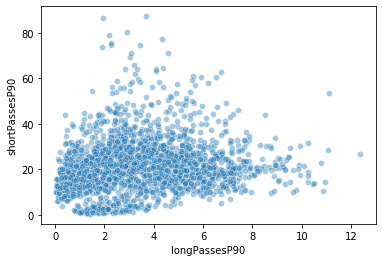

In [15]:
sns.scatterplot(data=data,x='longPassesP90',y='shortPassesP90',alpha=0.4)

In [17]:
data['is_gk'] = (data.position=='gk')
data.head()

,teamId,position,longPassesP90,longPassesAccPC,shortPassesP90,shortPassesAccPC,forwardPassesP90,forwardPassesAccPC,backwardPassesP90,backwardPassesAccPC,keyPassesP90,PassesP90,is_gk
playerId,,,,,,,,,,,,,
0,48,rw,4.193361,33.125000,17.979033,78.279883,16.668608,52.201258,17.533489,71.898356,0.629004,22.172394,False
1,74,rw,2.052821,21.052632,12.641056,79.487179,9.075630,26.190476,15.990396,67.567568,0.756303,14.693878,False
2,26,gk,1.773098,72.413793,5.013587,100.000000,8.987772,93.877551,0.366848,100.000000,0.061141,6.786685,True
3,50,rcb,5.086436,61.176471,15.857713,88.301887,19.627660,74.085366,7.539894,89.682540,0.000000,20.944149,False
4,68,lb,7.367933,41.886792,14.652456,84.819734,19.267841,53.823954,9.091752,81.345566,0.166821,22.020389,False


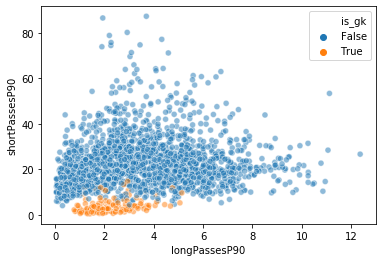

In [21]:
sns.scatterplot(data=data,x='longPassesP90',y='shortPassesP90',hue='is_gk',alpha=0.5)

swarmplots to compare the long passing accuracy of goalkeepers to outfield players

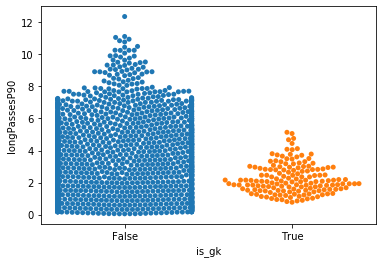

In [22]:
sns.swarmplot(data=data,x='is_gk',y='longPassesP90')

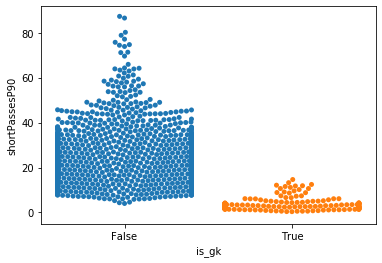

In [23]:
sns.swarmplot(data=data,x='is_gk',y='shortPassesP90')

Since Seaborn aren't polished enough to publih animations. Seaborn is built using matplotlib we can tweak the seaborn figures easily by using matplotlib methods.  For example, we can specify the size, alter the axis labels or add custom elements to the plot.

Below we build a more complex graphic showing how a given player's pass accuracy compares to others by combining violinplots, swamplots and matplotlib plotting.

In [57]:
#First extract the data of a player

player = data.loc[2085]

spa, lpa, fpa = player[['shortPassesAccPC','longPassesAccPC','forwardPassesAccPC']]

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

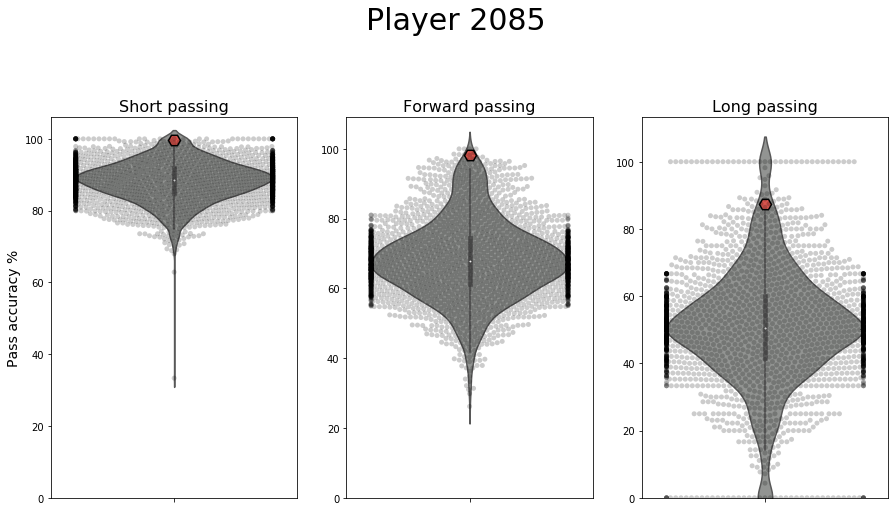

In [59]:
plt.figure(figsize=(15,7))
#Add a subplot to the figure as the first in a 3x1 layout
ax = plt.subplot(131)


#Use seaborn to add a violin plot to the ax object by provinding it to the seaborn method (ax=ax)
sns.violinplot(ax=ax, data=data, y='shortPassesAccPC', color='xkcd:grey')
# On put black markers at 10% opacity on top of the violin
sns.swarmplot(ax=ax, data=data, y='shortPassesAccPC', color='k', alpha=0.2)
#Highlight the player of interest with a red hexagon outlined in black.
plt.plot([0], [spa], marker='H', ms=12, c='xkcd:pale red',  markeredgewidth=1.5, markeredgecolor='k')

#Customise the matplotlib style
ax.set_ylim(0,)
ax.set_title('Short passing', size=16)
ax.set_ylabel('Pass accuracy %', size=14)

#The same for forward passes
ax = plt.subplot(132)
sns.violinplot(ax=ax, data=data, y='forwardPassesAccPC', color='xkcd:grey')
sns.swarmplot(ax=ax, data=data, y='forwardPassesAccPC', color='k',alpha=0.2)
plt.plot([0], [fpa], marker='H', ms=12, c='xkcd:pale red',  markeredgewidth=1.5, markeredgecolor='k')

ax.set_ylim(0,)
ax.set_title('Forward passing', size=16)
ax.set_ylabel('')

#The same for long passes
ax = plt.subplot(133)
sns.violinplot(ax=ax, data=data, y='longPassesAccPC', color='xkcd:grey')
sns.swarmplot(ax=ax, data=data, y='longPassesAccPC', color='k', alpha=0.2)
plt.plot([0], [lpa], marker='H', ms=12, c='xkcd:pale red',  markeredgewidth=1.5, markeredgecolor='k')
ax.set_ylim(0,)
ax.set_title('Long passing', size=16)
ax.set_ylabel('');

#Add a title for the full figure (use the y parameter to move this title up)
plt.suptitle('Player 2085', size=30, y=1.1);

In [56]:
p1 = data.loc[2085]
p1

teamId                      16
position                   rcb
longPassesP90          2.92089
longPassesAccPC           87.5
shortPassesP90         80.2333
shortPassesAccPC       99.7725
forwardPassesP90       49.8377
forwardPassesAccPC     98.3516
backwardPassesP90       30.213
backwardPassesAccPC        100
keyPassesP90                 0
PassesP90              83.1542
is_gk                    False
Name: 2085, dtype: object

In [60]:
data['longPassesAccPC'].max()

100.0

In [61]:
data['shortPassesAccPC'].max()

100.0

In [62]:
player_of_interest = data.loc[1343]

sp90, lp90, pp90 = player_of_interest[['shortPassesP90','longPassesP90','PassesP90']]

Text(0.5, 1.1, 'Player 1343')

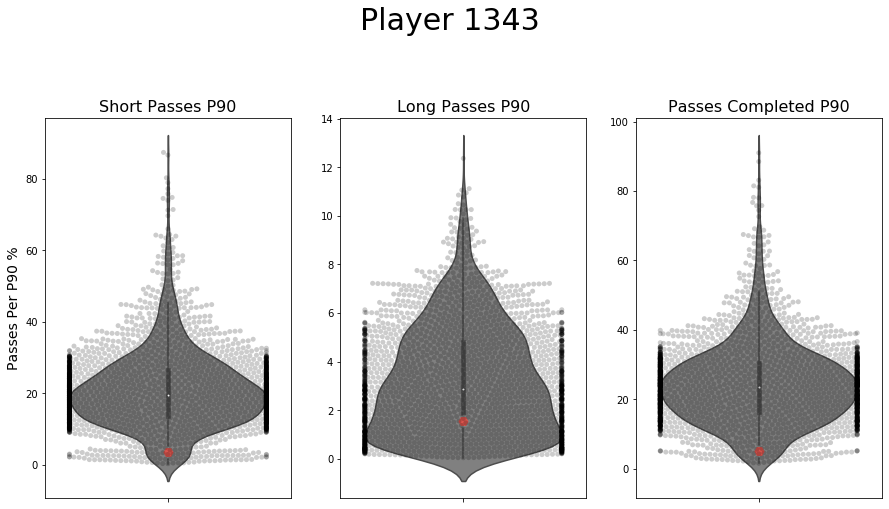

In [76]:
plt.figure(figsize=(15,7))

ax = plt.subplot(131)

#Short Passes
sns.violinplot(data=data,y='shortPassesP90',color='grey')
sns.swarmplot(data=data,y='shortPassesP90',color='k',alpha=0.2)
plt.plot([0],[sp90],marker='H',ms=12,c='xkcd:pale red',markeredgewidth=1.5,markeredgecolor='grey')

#ax.set_ylim(0,)
ax.set_title('Short Passes P90',size=16)
ax.set_ylabel('Passes Per P90 %',size=14)

#long Passes
ax = plt.subplot(132)
sns.violinplot(data=data,y='longPassesP90',color='grey')
sns.swarmplot(data=data,y='longPassesP90',color='k',alpha=0.2)
plt.plot([0],[lp90],marker='H',ms=12,c='xkcd:pale red',markeredgewidth=1.5,markeredgecolor='grey')

ax.set_title('Long Passes P90',size=16)
ax.set_ylabel('')

#Passes P90
ax = plt.subplot(133)
sns.violinplot(data=data,y='PassesP90',color='grey')
sns.swarmplot(data=data,y='PassesP90',color='k',alpha=0.2)
plt.plot([0],[pp90],marker='H',ms=12,c='xkcd:pale red',markeredgewidth=1.5,markeredgecolor='grey')

ax.set_title('Passes Completed P90',size=16)
ax.set_ylabel('')

plt.suptitle('Player 1343',size=30,y=1.1)

In [77]:
player_of_interest

teamId                      11
position                    gk
longPassesP90          1.57654
longPassesAccPC         84.058
shortPassesP90         3.49581
shortPassesAccPC       97.3856
forwardPassesP90       7.47144
forwardPassesAccPC     95.7187
backwardPassesP90      0.43412
backwardPassesAccPC        100
keyPassesP90                 0
PassesP90              5.07235
is_gk                     True
Name: 1343, dtype: object